#Cliff-Walking

### Utility Functions

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors

In [2]:
def get_path_from_trajectory(trajectory):
    pred_dict = dict()
    path = []
    for traj in trajectory:
        curr, c, pred = traj
        pred_dict[curr] = (pred, c)
    curr, c, pred = trajectory[-1]
    path.append((curr, c))
    while pred[0] is not None:
        curr = pred
        pred, c = pred_dict[curr]
        path.append((curr, c))
    path.reverse()
    return path


def get_directions(change_order=False):
    if not change_order:
        # Up, Down, Right, Left
        dx = [-1, +0, +1, +0]
        dy = [+0, +1, +0, -1]
    else:
        # Right, Down, Left, Up
        dx = [+0, +1, +0, -1]
        dy = [+1, +0, -1, +0]
    return dx, dy

In [3]:
def print_matrix(matrix):
    m = len(matrix)
    n = len(matrix[0])
    print(m, 'x', n)
    fill = '0'
    align = '>'
    width = 1
    for r in range(m):
        for c in range(n):
            print(f'{matrix[r][c]:{fill}{align}{width}}', end=' ')
        print()


def print_matrix_path(matrix, path, title):
    matrix_path = np.zeros(matrix.shape, dtype=int)
    for p in path:
        (x, y), c = p
        matrix_path[x, y] = c
    np.set_printoptions(formatter={'int': " {:2d} ".format})
    # print_matrix(matrix_path)
    # plot_matrix_path(matrix_path, f"{title} - Path")
    plot_matrix(matrix_path, f"{title} - Path")
    print("==============================================================")
    print("\n\nPath:")
    print(matrix_path)


def print_matrix_traj(matrix, trajectory, title):
    matrix_path = np.zeros(matrix.shape, dtype=int)
    for p in trajectory:
        (x, y), c, _ = p
        matrix_path[x, y] = c
    np.set_printoptions(formatter={'int': " {:2d} ".format})
    plot_matrix(matrix_path, f"{title} - Trajectory")


def print_title_path(title, matrix, path, trajectory):
    print(f"{title}:")
    print("==============================================================")
    print_matrix_traj(matrix, trajectory, title)
    print("==============================================================")
    print_matrix_path(matrix, path, title)
    pass


def plot_matrix_path(path_matrix, title=None):
    colormap = colors.ListedColormap(["green", "blue", "red"])
    plt.title(title)
    plt.imshow(path_matrix, cmap=colormap)
    plt.show()


def plot_matrix(matrix, title=None):
    fig, ax = plt.subplots(figsize=(10, 5))
    plt.title(title)
    ax.matshow(matrix, cmap=plt.cm.Blues)
    for i in range(9, -1, -1):
        for j in range(5, -1, -1):
            c = matrix[j, i]
            ax.text(i, j, str(c), va='center', ha='center')
    plt.show()

In [4]:
input_cost = [
    "1 1 1 1 1 1 1 1 1 1",
    "1 1 1 1 1 1 1 1 1 1",
    "1 5 5 5 1 5 5 5 1 1",
    "1 5 5 5 1 5 5 5 1 1",
    "1 5 5 5 1 5 5 5 1 1",
    "1 0 0 0 0 0 0 0 0 1",
]

In [5]:
def read_input(lines):
    input = []
    for line in lines:
        input.append([int(s) for s in line.split(" ")])
    return input

cost_matrix = np.array(read_input(input_cost))
print_matrix(cost_matrix)

6 x 10
1 1 1 1 1 1 1 1 1 1 
1 1 1 1 1 1 1 1 1 1 
1 5 5 5 1 5 5 5 1 1 
1 5 5 5 1 5 5 5 1 1 
1 5 5 5 1 5 5 5 1 1 
1 0 0 0 0 0 0 0 0 1 


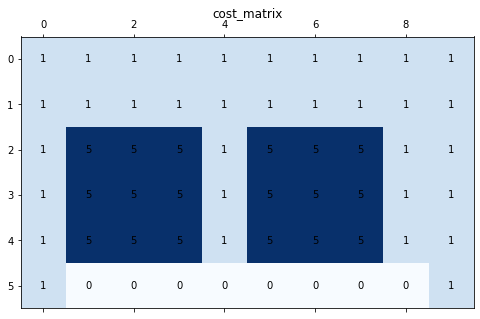

In [6]:
# 0 -> Clif
# 5 -> Water
# 1 -> Cell
plot_matrix(cost_matrix, f"cost_matrix")

In [7]:
import heapq

class PriorityQueue:
    def __init__(self):
        self.heap = []
        self.count = 0

    def push(self, item, priority):
        entry = (priority, self.count, item)
        heapq.heappush(self.heap, entry)
        self.count += 1

    def pop(self):
        (_, _, item) = heapq.heappop(self.heap)
        return item

    def isEmpty(self):
        return len(self.heap) == 0

    def update(self, item, priority):
        for index, (p, c, i) in enumerate(self.heap):
            if i == item:
                if p <= priority:
                    break
                del self.heap[index]
                self.heap.append((priority, c, item))
                heapq.heapify(self.heap)
                break
        else:
            self.push(item, priority)

# Uninformed Search

## DFS

In [8]:
def dfs(matrix, start_state, goal_state, change_order=False):
    dx, dy = get_directions(change_order)
    vis = np.full(matrix.shape, False)
    x, y = start_state
    trajectory = []
    stack = [((x, y), 0, (None, None))]
    m, n = matrix.shape

    while len(stack) > 0:
        curr = stack.pop()
        (x, y), c, (_, _) = curr
        if vis[x, y]:
            continue
        vis[x, y] = True
        trajectory.append(curr)
        if (x, y) == goal_state:
            path = get_path_from_trajectory(trajectory)
            return path, trajectory
        for d in range(4):
            nx = x + dx[d]
            ny = y + dy[d]
            if nx < 0 or m <= nx or ny < 0 or n <= ny:
                continue
            if matrix[nx, ny] != 0:
                stack.append(((nx, ny), c + matrix[nx, ny], (x, y)))
    return list(), list()

DFS:


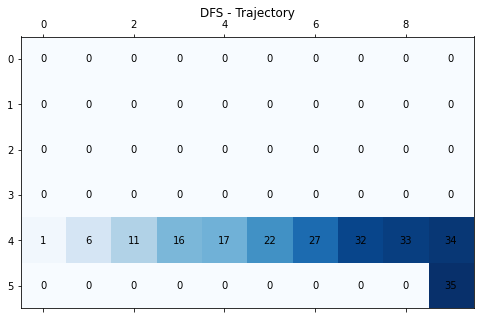

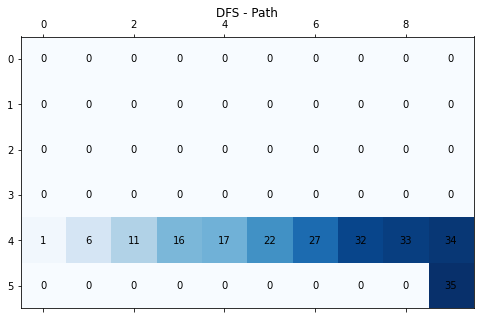



Path:
[[  0    0    0    0    0    0    0    0    0    0 ]
 [  0    0    0    0    0    0    0    0    0    0 ]
 [  0    0    0    0    0    0    0    0    0    0 ]
 [  0    0    0    0    0    0    0    0    0    0 ]
 [  1    6   11   16   17   22   27   32   33   34 ]
 [  0    0    0    0    0    0    0    0    0   35 ]]


In [9]:
cost_path, cost_trajectory = dfs(cost_matrix, start_state=(5, 0), goal_state=(5, 9))
print_title_path("DFS", cost_matrix, cost_path, cost_trajectory)

### DFS order changed

DFS Order Changed:


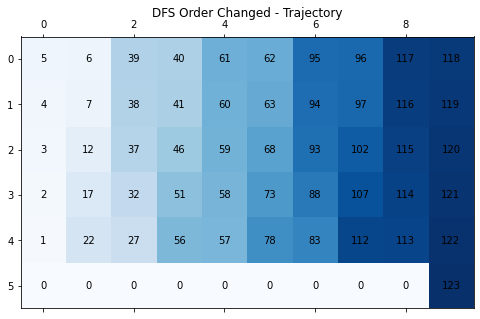

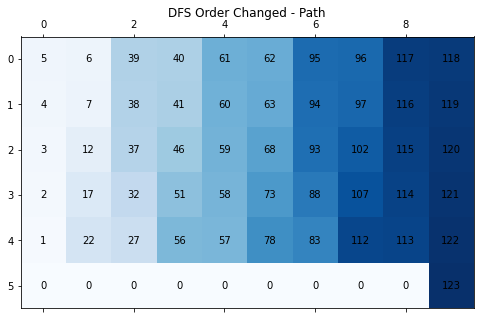



Path:
[[  5    6   39   40   61   62   95   96   117   118 ]
 [  4    7   38   41   60   63   94   97   116   119 ]
 [  3   12   37   46   59   68   93   102   115   120 ]
 [  2   17   32   51   58   73   88   107   114   121 ]
 [  1   22   27   56   57   78   83   112   113   122 ]
 [  0    0    0    0    0    0    0    0    0   123 ]]


In [10]:
cost_path, cost_trajectory = dfs(cost_matrix, start_state=(5, 0), goal_state=(5, 9), change_order=True)
print_title_path("DFS Order Changed", cost_matrix, cost_path, cost_trajectory)

## BFS

In [11]:
def bfs(matrix, start_state, goal_state, change_order=False):
    dx, dy = get_directions(change_order)
    vis = np.full(matrix.shape, False)
    x, y = start_state
    trajectory = []
    queue = [((x, y), 0, (None, None))]
    m, n = matrix.shape

    while len(queue) > 0:
        curr = queue.pop(0)
        (x, y), c, (_, _) = curr
        if vis[x, y]:
            continue
        vis[x, y] = True
        trajectory.append(curr)
        if (x, y) == goal_state:
            path = get_path_from_trajectory(trajectory)
            return path, trajectory
        for d in range(4):
            nx = x + dx[d]
            ny = y + dy[d]
            if nx < 0 or m <= nx or ny < 0 or n <= ny:
                continue
            if matrix[nx, ny] != 0:
                queue.append(((nx, ny), c + matrix[nx, ny], (x, y)))
    return list()

BFS:


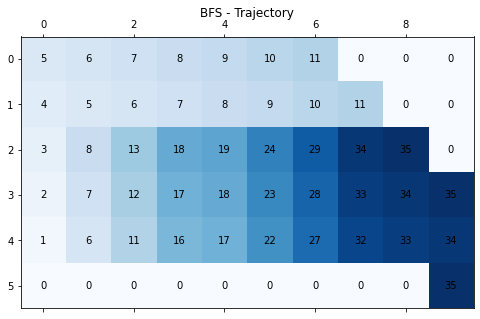

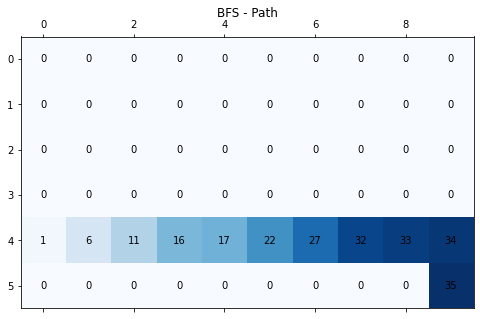



Path:
[[  0    0    0    0    0    0    0    0    0    0 ]
 [  0    0    0    0    0    0    0    0    0    0 ]
 [  0    0    0    0    0    0    0    0    0    0 ]
 [  0    0    0    0    0    0    0    0    0    0 ]
 [  1    6   11   16   17   22   27   32   33   34 ]
 [  0    0    0    0    0    0    0    0    0   35 ]]


In [12]:
cost_path, cost_trajectory = bfs(cost_matrix, start_state=(5, 0), goal_state=(5, 9))
print_title_path("BFS", cost_matrix, cost_path, cost_trajectory)

### BFS order changed

BFS Order Changed:


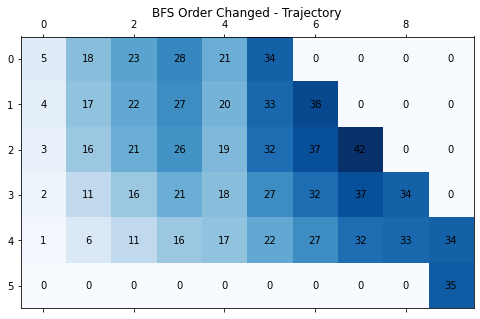

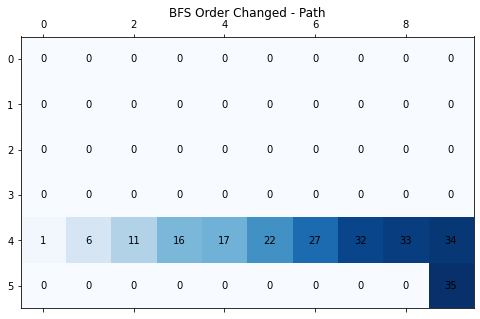



Path:
[[  0    0    0    0    0    0    0    0    0    0 ]
 [  0    0    0    0    0    0    0    0    0    0 ]
 [  0    0    0    0    0    0    0    0    0    0 ]
 [  0    0    0    0    0    0    0    0    0    0 ]
 [  1    6   11   16   17   22   27   32   33   34 ]
 [  0    0    0    0    0    0    0    0    0   35 ]]


In [13]:
cost_path, cost_trajectory = bfs(cost_matrix, start_state=(5, 0), goal_state=(5, 9), change_order=True)
print_title_path("BFS Order Changed", cost_matrix, cost_path, cost_trajectory)

## UCS

In [14]:
def ucs(matrix, start_state, goal_state, change_order=False):
    dx, dy = get_directions(change_order)
    vis = np.full(matrix.shape, False)
    x, y = start_state
    trajectory = []
    pq = PriorityQueue()
    pq.push(((x, y), 0, (None, None)), 0)
    m, n = matrix.shape

    while pq.isEmpty() is not True:
        curr = pq.pop()
        (x, y), c, (_, _) = curr
        if vis[x, y]:
            continue
        vis[x, y] = True
        trajectory.append(curr)
        if (x, y) == goal_state:
            path = get_path_from_trajectory(trajectory)
            return path, trajectory
        for d in range(4):
            nx = x + dx[d]
            ny = y + dy[d]
            if nx < 0 or m <= nx or ny < 0 or n <= ny:
                continue
            if matrix[nx, ny] != 0:
                pq.push(((nx, ny), c + matrix[nx, ny], (x, y)), c + matrix[nx, ny])
    return list()

UCS:


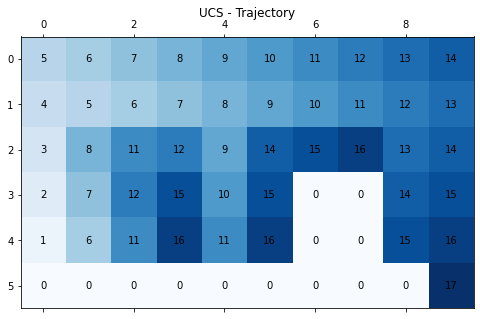

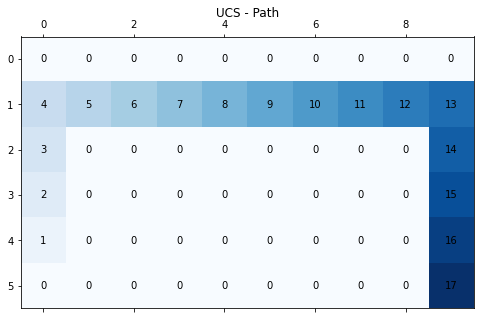



Path:
[[  0    0    0    0    0    0    0    0    0    0 ]
 [  4    5    6    7    8    9   10   11   12   13 ]
 [  3    0    0    0    0    0    0    0    0   14 ]
 [  2    0    0    0    0    0    0    0    0   15 ]
 [  1    0    0    0    0    0    0    0    0   16 ]
 [  0    0    0    0    0    0    0    0    0   17 ]]


In [15]:
cost_path, cost_trajectory = ucs(cost_matrix, start_state=(5, 0), goal_state=(5, 9))
print_title_path("UCS", cost_matrix, cost_path, cost_trajectory)

### UCS Order Changed

UCS Order Changed:


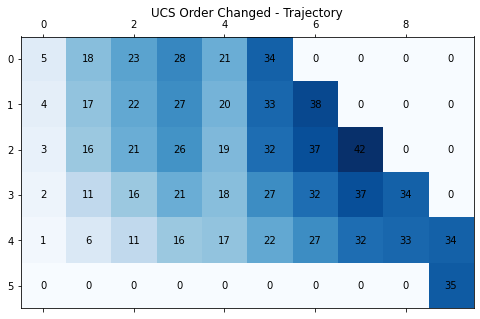

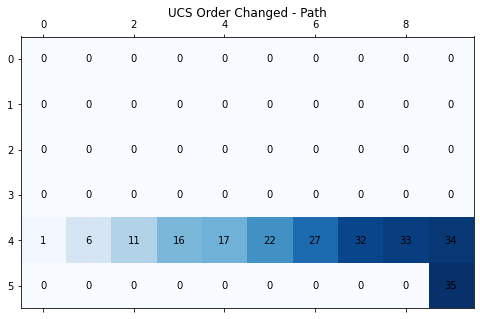



Path:
[[  0    0    0    0    0    0    0    0    0    0 ]
 [  0    0    0    0    0    0    0    0    0    0 ]
 [  0    0    0    0    0    0    0    0    0    0 ]
 [  0    0    0    0    0    0    0    0    0    0 ]
 [  1    6   11   16   17   22   27   32   33   34 ]
 [  0    0    0    0    0    0    0    0    0   35 ]]


In [16]:
cost_path, cost_trajectory = bfs(cost_matrix, start_state=(5, 0), goal_state=(5, 9), change_order=True)
print_title_path("UCS Order Changed", cost_matrix, cost_path, cost_trajectory)

# Informed Search

In [17]:
def manhattan_heuristic(curr, goal):
    return abs(curr[0] - goal[0]) + abs(curr[1] - goal[1])

In [18]:
def euclidean_heuristic(curr, goal):
    return ((curr[0] - goal[0]) ** 2 + (curr[1] - goal[1]) ** 2) ** 0.5

## Greedy

In [19]:
def greedy(matrix, start_state, goal_state, heuristic, change_order=False):
    dx, dy = get_directions(change_order)
    vis = np.full(matrix.shape, False)
    x, y = start_state
    trajectory = []
    pq = PriorityQueue()
    dist = heuristic((x, y), goal_state)
    pq.push(((x, y), 0, (None, None)), dist)
    m, n = matrix.shape

    while pq.isEmpty() is not True:
        curr = pq.pop()
        (x, y), c, (_, _) = curr
        if vis[x, y]:
            continue
        vis[x, y] = True
        trajectory.append(curr)
        if (x, y) == goal_state:
            path = get_path_from_trajectory(trajectory)
            return path, trajectory
        for d in range(4):
            nx = x + dx[d]
            ny = y + dy[d]
            if nx < 0 or m <= nx or ny < 0 or n <= ny:
                continue
            if matrix[nx, ny] != 0:
                dist = heuristic((nx, ny), goal_state)
                pq.push(((nx, ny), c + matrix[nx, ny], (x, y)), dist)
    return list()

## Greedy Manhattan

Greedy Manhattan:


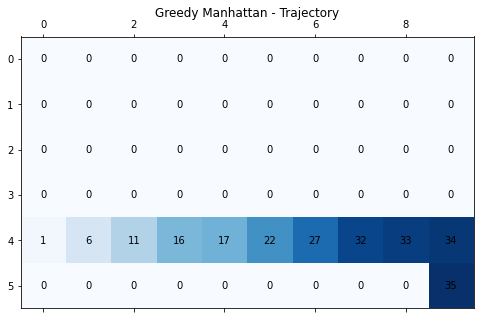

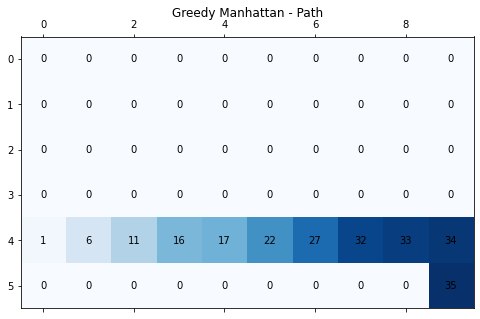



Path:
[[  0    0    0    0    0    0    0    0    0    0 ]
 [  0    0    0    0    0    0    0    0    0    0 ]
 [  0    0    0    0    0    0    0    0    0    0 ]
 [  0    0    0    0    0    0    0    0    0    0 ]
 [  1    6   11   16   17   22   27   32   33   34 ]
 [  0    0    0    0    0    0    0    0    0   35 ]]


In [20]:
cost_path, cost_trajectory = greedy(cost_matrix, start_state=(5, 0), goal_state=(5, 9),
                                    heuristic=manhattan_heuristic)
print_title_path("Greedy Manhattan", cost_matrix, cost_path, cost_trajectory)

### Greedy Manhattan Order Changed

Greedy Manhattan Order Changed:


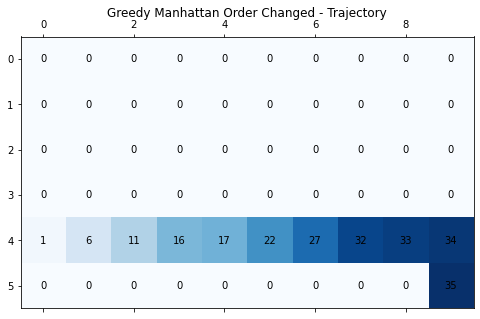

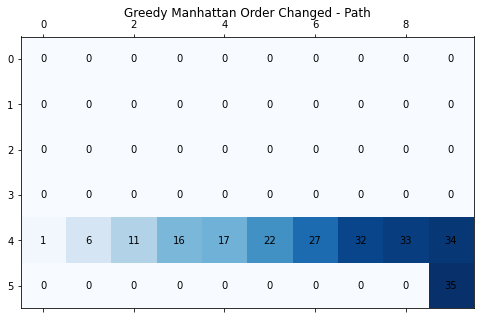



Path:
[[  0    0    0    0    0    0    0    0    0    0 ]
 [  0    0    0    0    0    0    0    0    0    0 ]
 [  0    0    0    0    0    0    0    0    0    0 ]
 [  0    0    0    0    0    0    0    0    0    0 ]
 [  1    6   11   16   17   22   27   32   33   34 ]
 [  0    0    0    0    0    0    0    0    0   35 ]]


In [21]:
cost_path, cost_trajectory = greedy(cost_matrix, start_state=(5, 0), goal_state=(5, 9),
                                    heuristic=manhattan_heuristic, change_order=True)
print_title_path("Greedy Manhattan Order Changed", cost_matrix, cost_path, cost_trajectory)

## Greedy Euclidean

Greedy Euclidean:


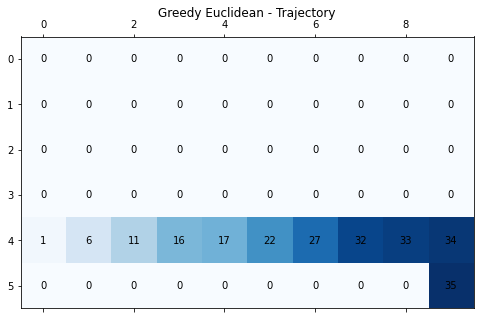

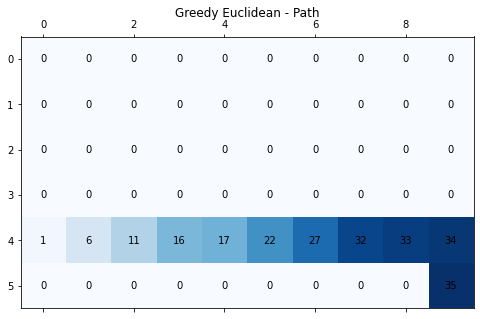



Path:
[[  0    0    0    0    0    0    0    0    0    0 ]
 [  0    0    0    0    0    0    0    0    0    0 ]
 [  0    0    0    0    0    0    0    0    0    0 ]
 [  0    0    0    0    0    0    0    0    0    0 ]
 [  1    6   11   16   17   22   27   32   33   34 ]
 [  0    0    0    0    0    0    0    0    0   35 ]]


In [22]:
cost_path, cost_trajectory = greedy(cost_matrix, start_state=(5, 0), goal_state=(5, 9),
                                        heuristic=euclidean_heuristic)
print_title_path("Greedy Euclidean", cost_matrix, cost_path, cost_trajectory)

### Greedy Euclidean Order Changed

Greedy Euclidean Order Changed:


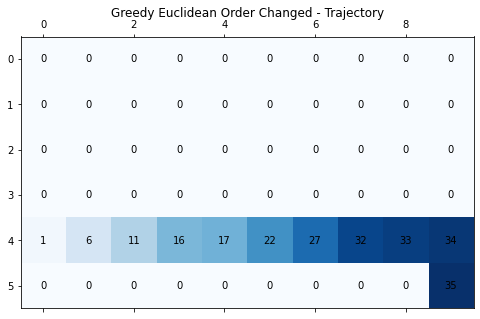

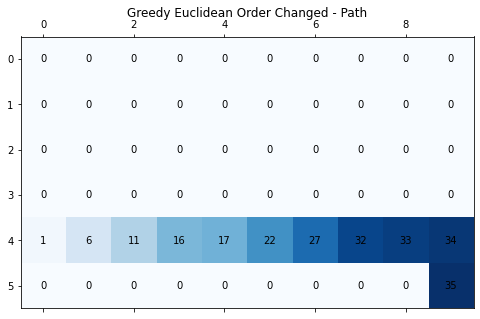



Path:
[[  0    0    0    0    0    0    0    0    0    0 ]
 [  0    0    0    0    0    0    0    0    0    0 ]
 [  0    0    0    0    0    0    0    0    0    0 ]
 [  0    0    0    0    0    0    0    0    0    0 ]
 [  1    6   11   16   17   22   27   32   33   34 ]
 [  0    0    0    0    0    0    0    0    0   35 ]]


In [23]:
cost_path, cost_trajectory = greedy(cost_matrix, start_state=(5, 0), goal_state=(5, 9),
                                        heuristic=euclidean_heuristic, change_order=True)
print_title_path("Greedy Euclidean Order Changed", cost_matrix, cost_path, cost_trajectory)

## A*

In [24]:
def AStarSearch(matrix, start_state, goal_state, heuristic, change_order=False):
    dx, dy = get_directions(change_order)
    vis = np.full(matrix.shape, False)
    x, y = start_state
    trajectory = []
    pq = PriorityQueue()
    dist = heuristic((x, y), goal_state)
    pq.push(((x, y), 0, (None, None)), 0 + dist)
    m, n = matrix.shape

    while pq.isEmpty() is not True:
        curr = pq.pop()
        (x, y), c, (_, _) = curr
        if vis[x, y]:
            continue
        vis[x, y] = True
        trajectory.append(curr)
        if (x, y) == goal_state:
            path = get_path_from_trajectory(trajectory)
            return path, trajectory
        for d in range(4):
            nx = x + dx[d]
            ny = y + dy[d]
            if nx < 0 or m <= nx or ny < 0 or n <= ny:
                continue
            if matrix[nx, ny] != 0:
                dist = heuristic((nx, ny), goal_state)
                pq.push(((nx, ny), c + matrix[nx, ny], (x, y)), c + matrix[nx, ny] + dist)
    return list()

## A* Manhattan

A* Manhattan:


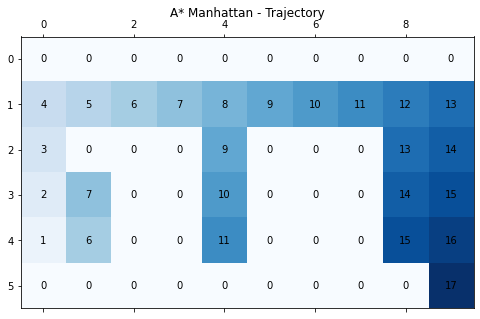

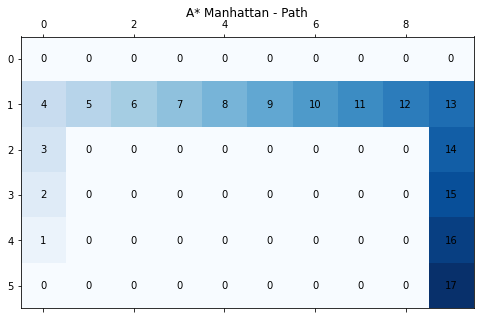



Path:
[[  0    0    0    0    0    0    0    0    0    0 ]
 [  4    5    6    7    8    9   10   11   12   13 ]
 [  3    0    0    0    0    0    0    0    0   14 ]
 [  2    0    0    0    0    0    0    0    0   15 ]
 [  1    0    0    0    0    0    0    0    0   16 ]
 [  0    0    0    0    0    0    0    0    0   17 ]]


In [25]:
cost_path, cost_trajectory = AStarSearch(cost_matrix, start_state=(5, 0), goal_state=(5, 9),
                                         heuristic=manhattan_heuristic)
print_title_path("A* Manhattan", cost_matrix, cost_path, cost_trajectory)

## A* Manhattan Order Changed

A* Manhattan Order Changed:


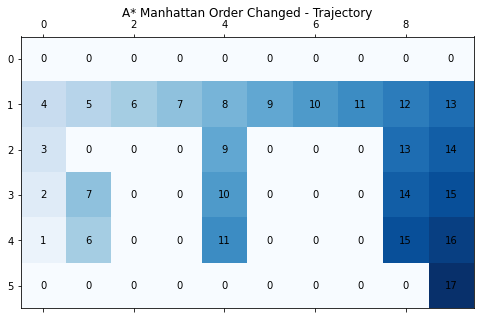

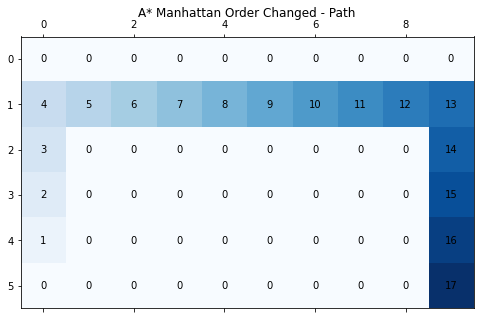



Path:
[[  0    0    0    0    0    0    0    0    0    0 ]
 [  4    5    6    7    8    9   10   11   12   13 ]
 [  3    0    0    0    0    0    0    0    0   14 ]
 [  2    0    0    0    0    0    0    0    0   15 ]
 [  1    0    0    0    0    0    0    0    0   16 ]
 [  0    0    0    0    0    0    0    0    0   17 ]]


In [26]:
cost_path, cost_trajectory = AStarSearch(cost_matrix, start_state=(5, 0), goal_state=(5, 9),
                                         heuristic=manhattan_heuristic, change_order=True)
print_title_path("A* Manhattan Order Changed", cost_matrix, cost_path, cost_trajectory)

## A* Euclidean

A* Euclidean:


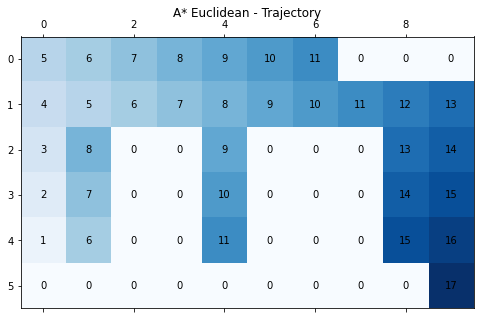

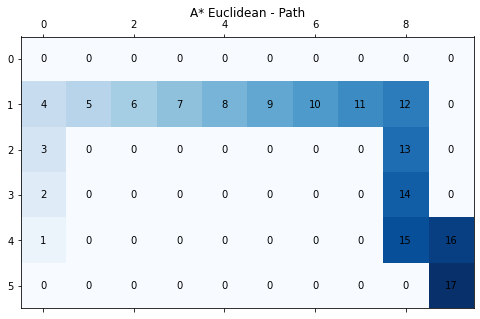



Path:
[[  0    0    0    0    0    0    0    0    0    0 ]
 [  4    5    6    7    8    9   10   11   12    0 ]
 [  3    0    0    0    0    0    0    0   13    0 ]
 [  2    0    0    0    0    0    0    0   14    0 ]
 [  1    0    0    0    0    0    0    0   15   16 ]
 [  0    0    0    0    0    0    0    0    0   17 ]]


In [27]:
cost_path, cost_trajectory = AStarSearch(cost_matrix, start_state=(5, 0), goal_state=(5, 9),
                                         heuristic=euclidean_heuristic)
print_title_path("A* Euclidean", cost_matrix, cost_path, cost_trajectory)

### A* Euclidean Order Changed

A* Euclidean Order Changed:


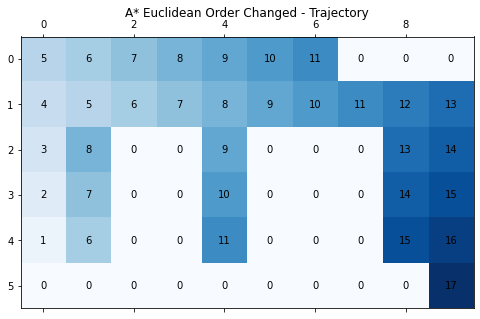

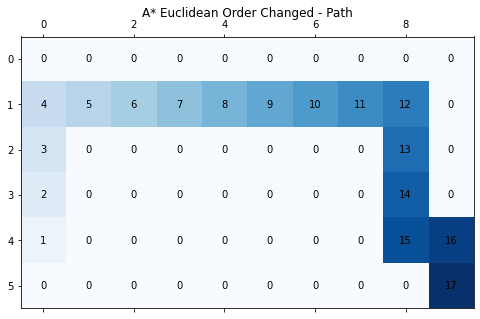



Path:
[[  0    0    0    0    0    0    0    0    0    0 ]
 [  4    5    6    7    8    9   10   11   12    0 ]
 [  3    0    0    0    0    0    0    0   13    0 ]
 [  2    0    0    0    0    0    0    0   14    0 ]
 [  1    0    0    0    0    0    0    0   15   16 ]
 [  0    0    0    0    0    0    0    0    0   17 ]]


In [28]:
cost_path, cost_trajectory = AStarSearch(cost_matrix, start_state=(5, 0), goal_state=(5, 9),
                                         heuristic=euclidean_heuristic, change_order=True)
print_title_path("A* Euclidean Order Changed", cost_matrix, cost_path, cost_trajectory)